In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
#import torch
#import torch.nn as nn # 인공 신경망 모델들 모아놓은 모듈
#import torch.nn.functional as F #그중 자주 쓰이는것들을 F로
#from torchvision import transforms, datasets
import cv2
#from torchvision import transforms, datasets
import pandas as pd
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt



In [2]:
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt

FIG_SIZE = (15,10)
sr=16000


healthy_audios = []
disorder_audios = []

healthy_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/healthy/phrase/export/94-phrase.wav')
healthy_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/healthy/phrase/export/2561-phrase.wav')
healthy_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/healthy/phrase/export/1179-phrase.wav')

disorder_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/pathology/phrase/export/1912-phrase.wav')
disorder_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/pathology/phrase/export/932-phrase.wav')
disorder_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/pathology/phrase/export/819-phrase.wav')


healthy_audios =[ librosa.load(aud, sr=sr)[0] for aud in healthy_audios ]
disorder_audios =[ librosa.load(aud, sr=sr)[0] for aud in disorder_audios ]



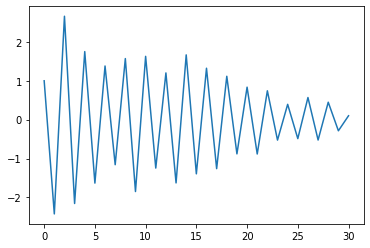

In [21]:
# lpc feature
lpc_data=librosa.lpc(disorder_audios[0], order=30)
plt.plot(lpc_data) #lpc data는 그냥 사용

In [40]:
#import scipy
import scipy

def statistical_feature(feature_vec):
    mean = np.mean(feature_vec)
    std = np.std(feature_vec) 
    maxv = np.amax(feature_vec) 
    minv = np.amin(feature_vec) 
    skew = scipy.stats.skew(feature_vec)
    kurt = scipy.stats.kurtosis(feature_vec)
    q1 = np.quantile(feature_vec, 0.25)
    median = np.median(feature_vec)
    q3 = np.quantile(feature_vec, 0.75)
    mode = scipy.stats.mode(feature_vec)[0][0]
    iqr = scipy.stats.iqr(feature_vec)
    
    return [mean, std, maxv, minv, median, skew, kurt, q1, q3, mode, iqr]

In [88]:
sample,_ = librosa.load('D:/project/voice_pathology_ai/voice_data/all_data_ver2/healthy/phrase/export/1091-phrase.wav',sr=16000)

In [104]:
# spectral slope
from scipy.signal import find_peaks
from scipy.interpolate import interp1d

n_fft = 2048

spec = np.fft.fft(sample, n_fft)
spec_db = librosa.amplitude_to_db(abs(spec[:n_fft // 2]), ref=np.max)
freqs = librosa.fft_frequencies(sr=sr, n_fft=n_fft)


peaks, _ = find_peaks(spec_db, height=-30)
envelope = interp1d(freqs[peaks], spec_db[peaks], bounds_error=False, fill_value=-100)
envelope(freqs)

array([-100., -100., -100., ..., -100., -100., -100.])

In [106]:
envelope(freqs)

array([-100., -100., -100., ..., -100., -100., -100.])

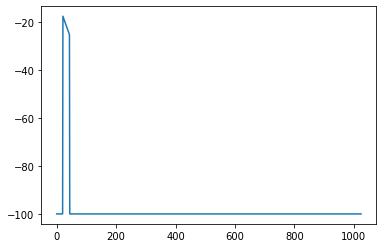

In [107]:
plt.plot(envelope(freqs))

In [76]:
import torchaudio.transforms as T


n_fft = 400
win_len = 400
hop_len = 160
mel_bins = 128


mfcc_scale = T.MFCC(
            sample_rate=16000,
            n_mfcc=30,
            melkwargs={
                "n_fft":n_fft,
                "win_length":win_len,
                "hop_length":hop_len,
                "n_mels":mel_bins,
                "f_min":130,
                "f_max":6800,
                "center":True,
                "pad_mode":"constant",
                "power":2.0,
                "norm":"slaney",
                "mel_scale":"slaney",
                "window_fn":torch.hann_window
            }
        )

################################################################################
### WARNING, path does not exist: KALDI_ROOT=/mnt/matylda5/iveselyk/Tools/kaldi-trunk
###          (please add 'export KALDI_ROOT=<your_path>' in your $HOME/.profile)
###          (or run as: KALDI_ROOT=<your_path> python <your_script>.py)
################################################################################



In [87]:
mfcc_scale(torch.from_numpy(sample).type(torch.float32)).size()


torch.Size([30, 153])

Text(0.5, 1.0, 'LP Model Forward Prediction')

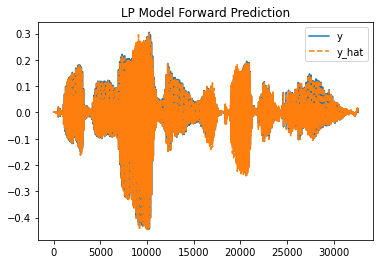

In [14]:
import scipy
a = librosa.lpc(disorder_audios[0], order=2)
b = np.hstack([[0], -1 * a[1:]])
y_hat = scipy.signal.lfilter(b, [1], disorder_audios[0])
fig, ax = plt.subplots()
ax.plot(disorder_audios[0])
ax.plot(y_hat, linestyle='--')
ax.legend(['y', 'y_hat'])
ax.set_title('LP Model Forward Prediction')

In [17]:
all_data=pd.read_excel('D:/project/voice_pathology_ai/voice_data/all_data_ver2_search.xlsx')
print('healthy', len(set(all_data[all_data['DIAG']=='control']['SPEAKER'].tolist())))
print('structural', len(set(all_data[all_data['DIAG']=='structural']['SPEAKER'].tolist())))
print('neurogenic', len(set(all_data[all_data['DIAG']=='neurogenic']['SPEAKER'].tolist())))
print('non-organic', len(set(all_data[all_data['DIAG']=='non-organic']['SPEAKER'].tolist())))
print('psychogenic', len(set(all_data[all_data['DIAG']=='psycho']['SPEAKER'].tolist())))
print('others', len(set(all_data[all_data['DIAG']=='else']['SPEAKER'].tolist())))

healthy 630
structural 269
neurogenic 164
non-organic 234
psychogenic 79
others 341


In [9]:
lpc_data

array([ 1.        , -2.4248457 ,  2.6596975 , -2.1569028 ,  1.7503939 ,
       -1.6322031 ,  1.3799676 , -1.1590513 ,  1.5708734 , -1.8494166 ,
        1.6279826 , -1.2456994 ,  1.201677  , -1.6275978 ,  1.6657431 ,
       -1.394009  ,  1.3225545 , -1.2606367 ,  1.1156398 , -0.88050896,
        0.83535874, -0.88362455,  0.74218154, -0.52607846,  0.39390987,
       -0.48817915,  0.5689027 , -0.52415824,  0.44834536, -0.28615734,
        0.09980637], dtype=float32)

In [90]:
disorder_audios[0].shape

(32598,)

In [72]:
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt

FIG_SIZE = (15,10)
sr=16000


healthy_audios = []
disorder_audios = []

healthy_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/healthy/phrase/export/946-phrase.wav')
healthy_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/healthy/phrase/export/1181-phrase.wav')
healthy_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/healthy/phrase/export/1026-phrase.wav')

disorder_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/pathology/phrase/export/876-phrase.wav')
disorder_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/pathology/phrase/export/2028-phrase.wav')
disorder_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/pathology/phrase/export/2543-phrase.wav')


healthy_audios =[ librosa.load(aud, sr=sr)[0] for aud in healthy_audios ]
disorder_audios =[ librosa.load(aud, sr=sr)[0] for aud in disorder_audios ]



(45457,)

In [5]:
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt

FIG_SIZE = (15,10)
sr=16000


healthy_audios = []
disorder_audios = []

healthy_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/healthy/phrase/export/60-phrase.wav')
healthy_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/healthy/phrase/export/79-phrase.wav')
healthy_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/healthy/phrase/export/94-phrase.wav')

disorder_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/pathology/phrase/export/101-phrase.wav')
disorder_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/pathology/phrase/export/1325-phrase.wav')
disorder_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/pathology/phrase/export/1671-phrase.wav')


healthy_audios =[ librosa.load(aud, sr=sr)[0] for aud in healthy_audios ]
disorder_audios =[ librosa.load(aud, sr=sr)[0] for aud in disorder_audios ]



(26640,)

In [2]:
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt

FIG_SIZE = (15,10)
sr=16000


healthy_audios = []
disorder_audios = []

healthy_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/healthy/a/high/export/60-a_h.wav')
healthy_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/healthy/a/high/export/79-a_h.wav')
healthy_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/healthy/a/high/export/94-a_h.wav')

disorder_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/pathology/a/high/export/1229-a_h.wav')
disorder_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/pathology/a/high/export/1325-a_h.wav')
disorder_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/pathology/a/high/export/1671-a_h.wav')


healthy_audios =[ librosa.load(aud, sr=sr)[0] for aud in healthy_audios ]
disorder_audios =[ librosa.load(aud, sr=sr)[0] for aud in disorder_audios ]



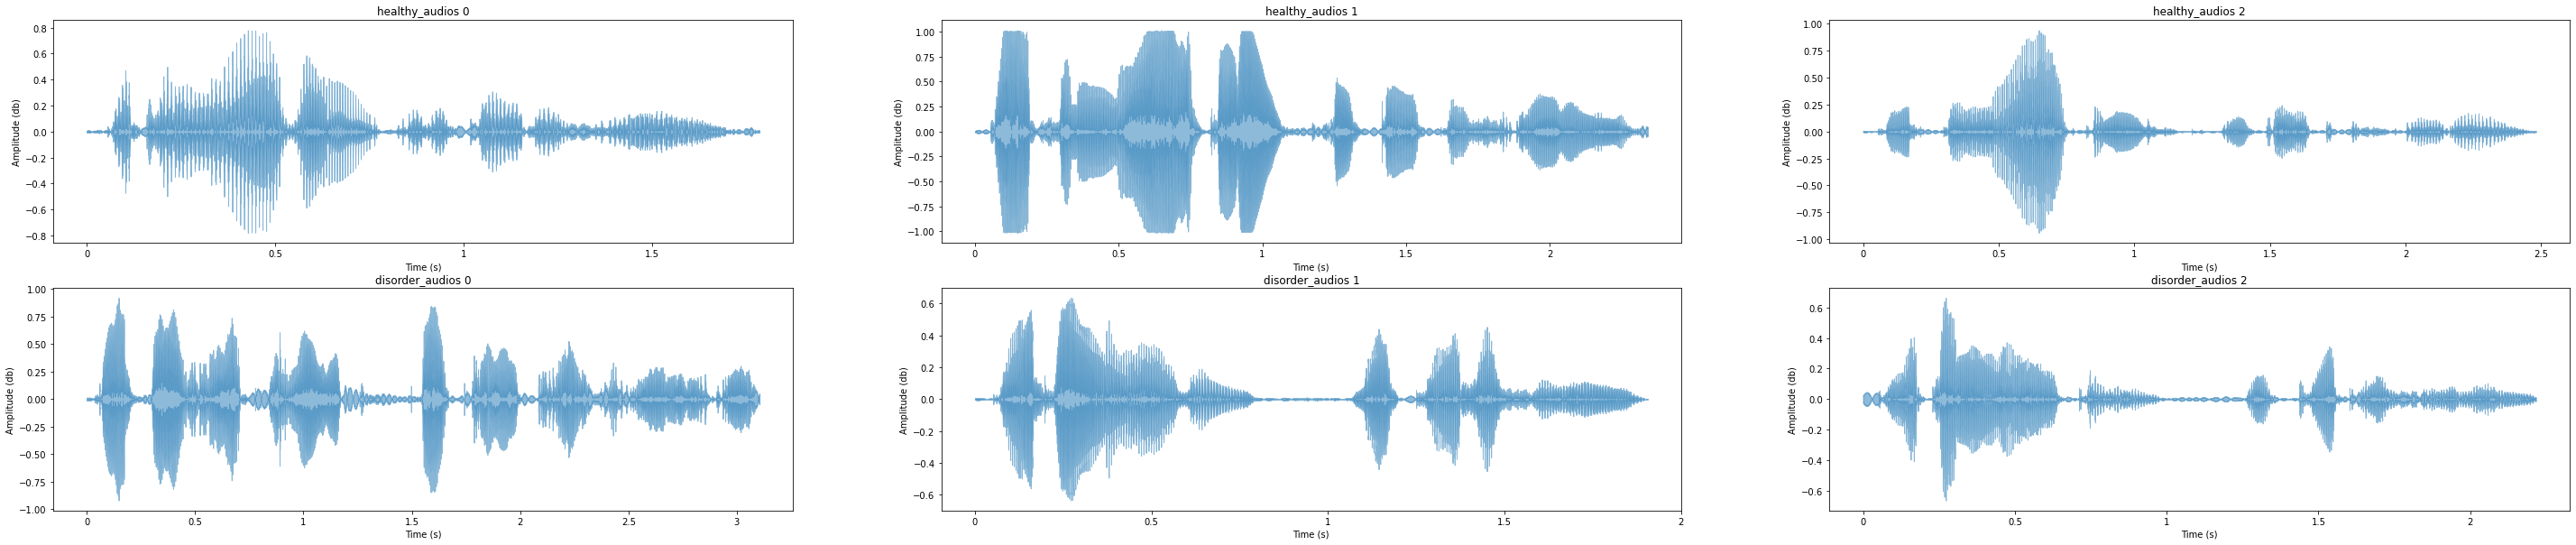

In [6]:
pltsize = 5
plt.figure(figsize=(10*pltsize,pltsize*2))#하나당 50,5

for i in range(3):
    plt.subplot(2,3,i+1)
    librosa.display.waveshow(healthy_audios[i], sr=sr, alpha=0.5)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (db)")
    plt.title("healthy_audios "+str(i))

for i in range(3):
    plt.subplot(2,3,i+3+1)
    librosa.display.waveshow(disorder_audios[i], sr=sr, alpha=0.5)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (db)")
    plt.title("disorder_audios "+str(i))

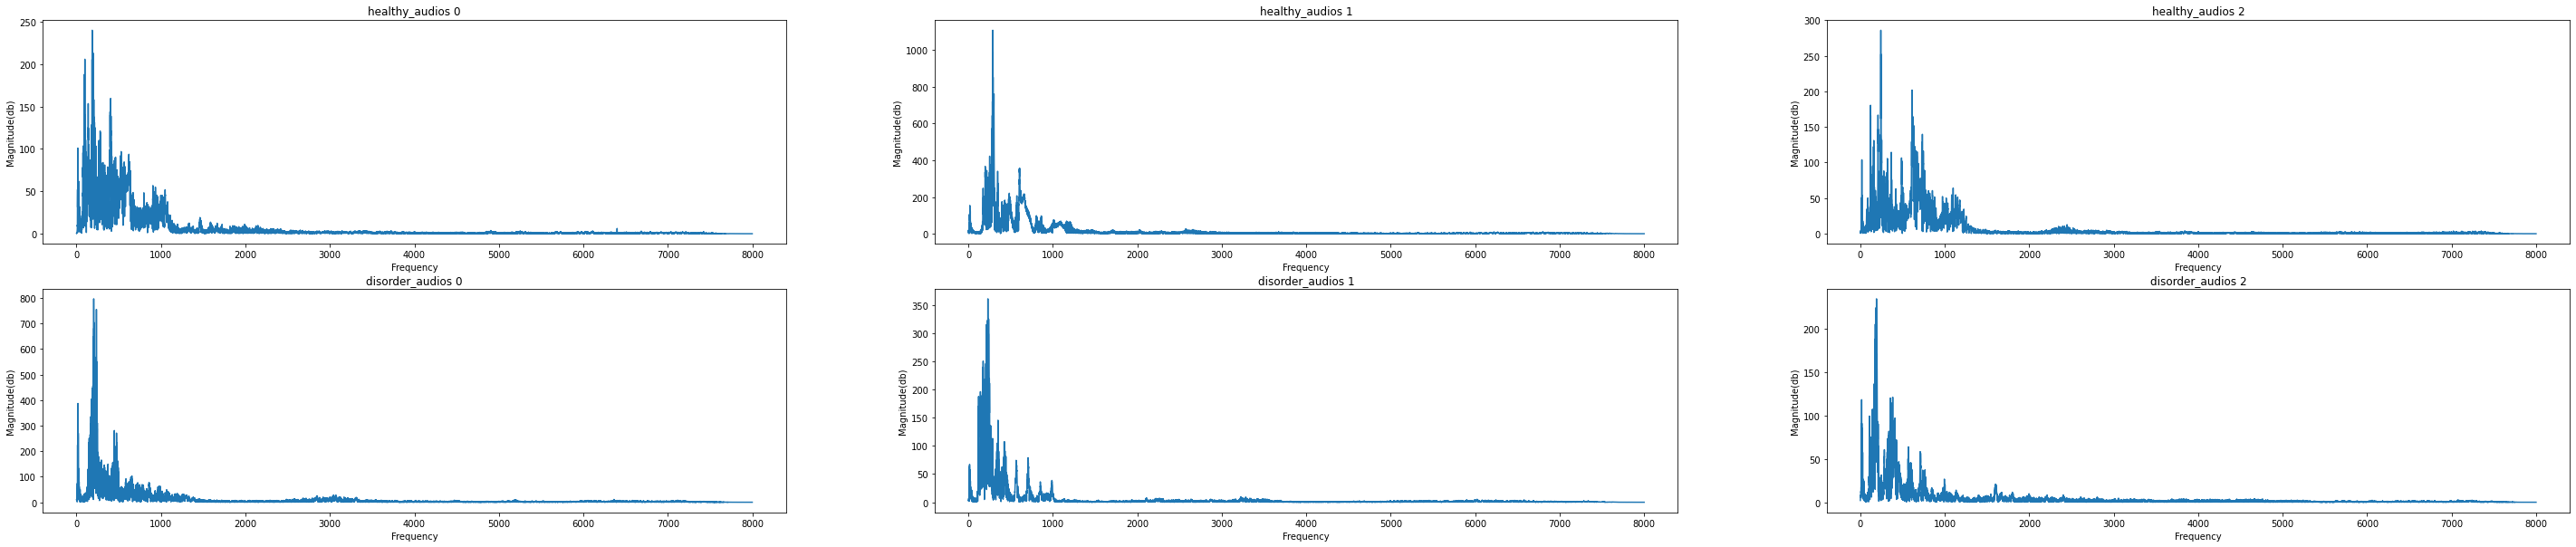

In [10]:
pltsize = 5
plt.figure(figsize=(10*pltsize,pltsize*2))#하나당 50,5

for i in range(3):
    plt.subplot(2,3,i+1)
    fft = np.fft.fft(healthy_audios[i])

    # 복소공간 값 절댓갑 취해서, magnitude 구하기
    magnitude = np.abs(fft) 

    # Frequency 값 만들기
    f = np.linspace(0,sr,len(magnitude))

    # 푸리에 변환을 통과한 specturm은 대칭구조로 나와서 high frequency 부분 절반을 날려고 앞쪽 절반만 사용한다.
    #left_spectrum = magnitude
    #left_f=f
    left_spectrum = magnitude[:int(len(magnitude)/2)]
    left_f = f[:int(len(magnitude)/2)]

    plt.plot(left_f, left_spectrum)
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude(db)")
    plt.title("healthy_audios "+str(i))

for i in range(3):
    plt.subplot(2,3,i+3+1)
    fft = np.fft.fft(disorder_audios[i])

    # 복소공간 값 절댓갑 취해서, magnitude 구하기
    magnitude = np.abs(fft) 

    # Frequency 값 만들기
    f = np.linspace(0,sr,len(magnitude))

    # 푸리에 변환을 통과한 specturm은 대칭구조로 나와서 high frequency 부분 절반을 날려고 앞쪽 절반만 사용한다.
    #left_spectrum = magnitude
    #left_f=f
    left_spectrum = magnitude[:int(len(magnitude)/2)]
    left_f = f[:int(len(magnitude)/2)]

    plt.plot(left_f, left_spectrum)
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude(db)")
    plt.title("disorder_audios "+str(i))

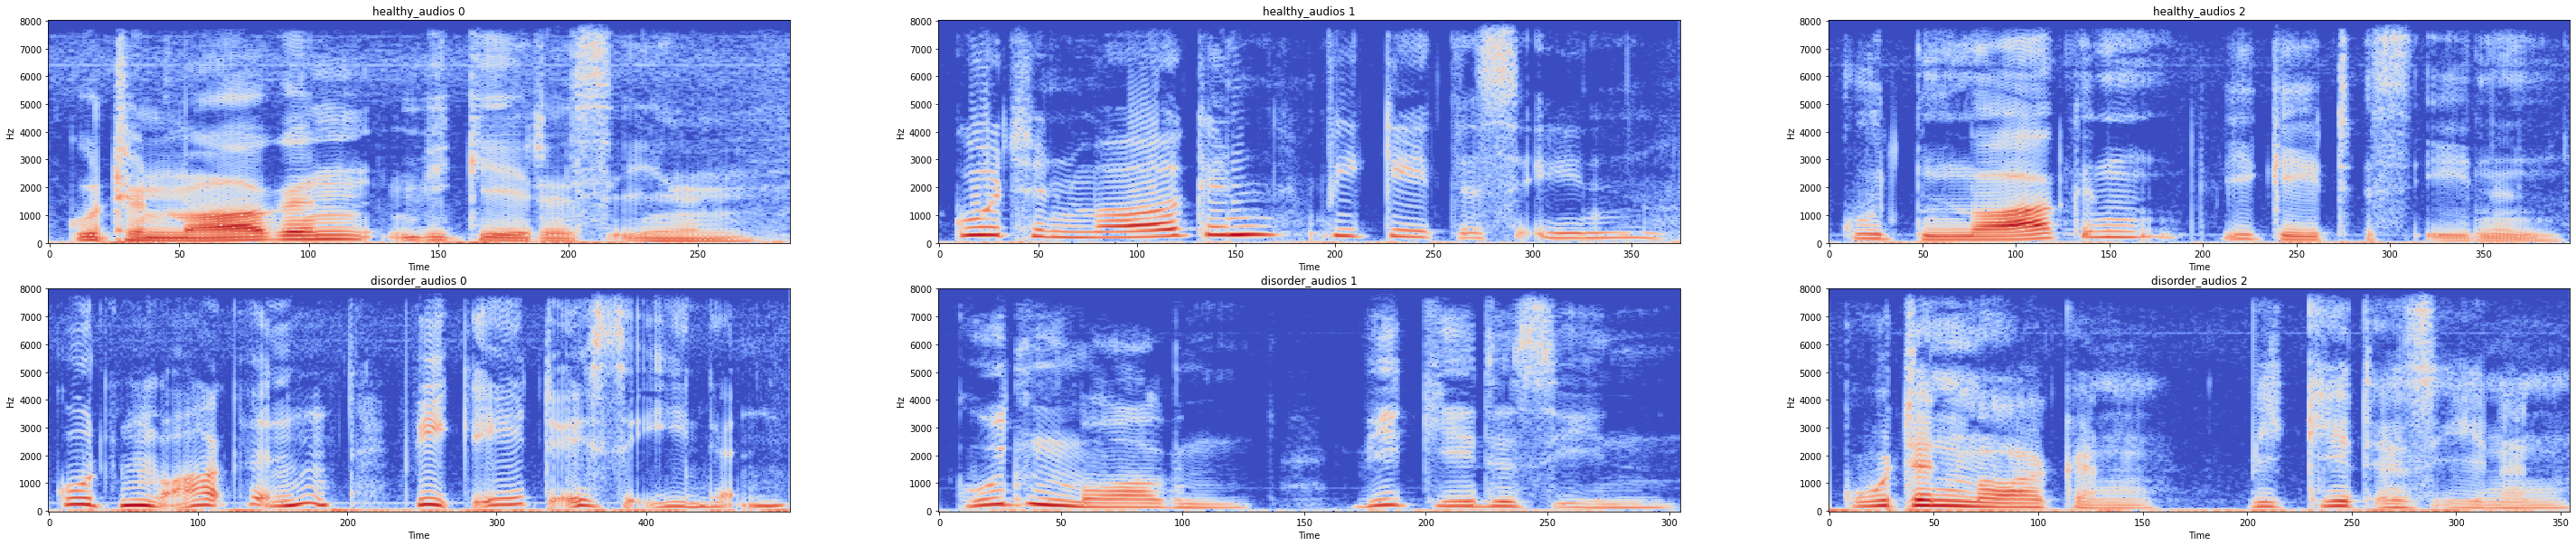

In [11]:
pltsize = 5
plt.figure(figsize=(10*pltsize,pltsize*2))#하나당 50,5

for i in range(3):
    plt.subplot(2,3,i+1)
    #sr=16000
    win_length =  np.int64(sr/40) # 1250
    n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
    hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

    stft = librosa.stft(healthy_audios[i], win_length=win_length,n_fft=n_fft, hop_length=hop_length)
    magnitude = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(magnitude)#[:50,:]

    librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length,x_axis='frames',y_axis='linear')
    plt.xlabel("Time")
    plt.title("healthy_audios "+str(i))

for i in range(3):
    plt.subplot(2,3,i+3+1)
    #sr=16000
    win_length =  np.int64(sr/40) # 1250
    n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
    hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

    stft = librosa.stft(disorder_audios[i], win_length=win_length,n_fft=n_fft, hop_length=hop_length)
    magnitude = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(magnitude)#[:50,:]

    librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length,x_axis='frames',y_axis='linear')
    plt.xlabel("Time")
    plt.title("disorder_audios "+str(i))

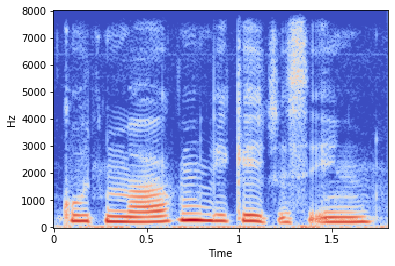

In [13]:

sr=16000
win_length =  np.int64(sr/40) # 1250
n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

stft = librosa.stft(disorder_audios[1], win_length=win_length,n_fft=n_fft, hop_length=hop_length)
magnitude = np.abs(stft)
log_spectrogram = librosa.amplitude_to_db(magnitude)#[:50,:]

librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length,x_axis='time',y_axis='linear')
plt.xlabel("Time")
#plt.title("disorder_audios "+str(i))
plt.savefig("spectro_932.png",dpi=500)

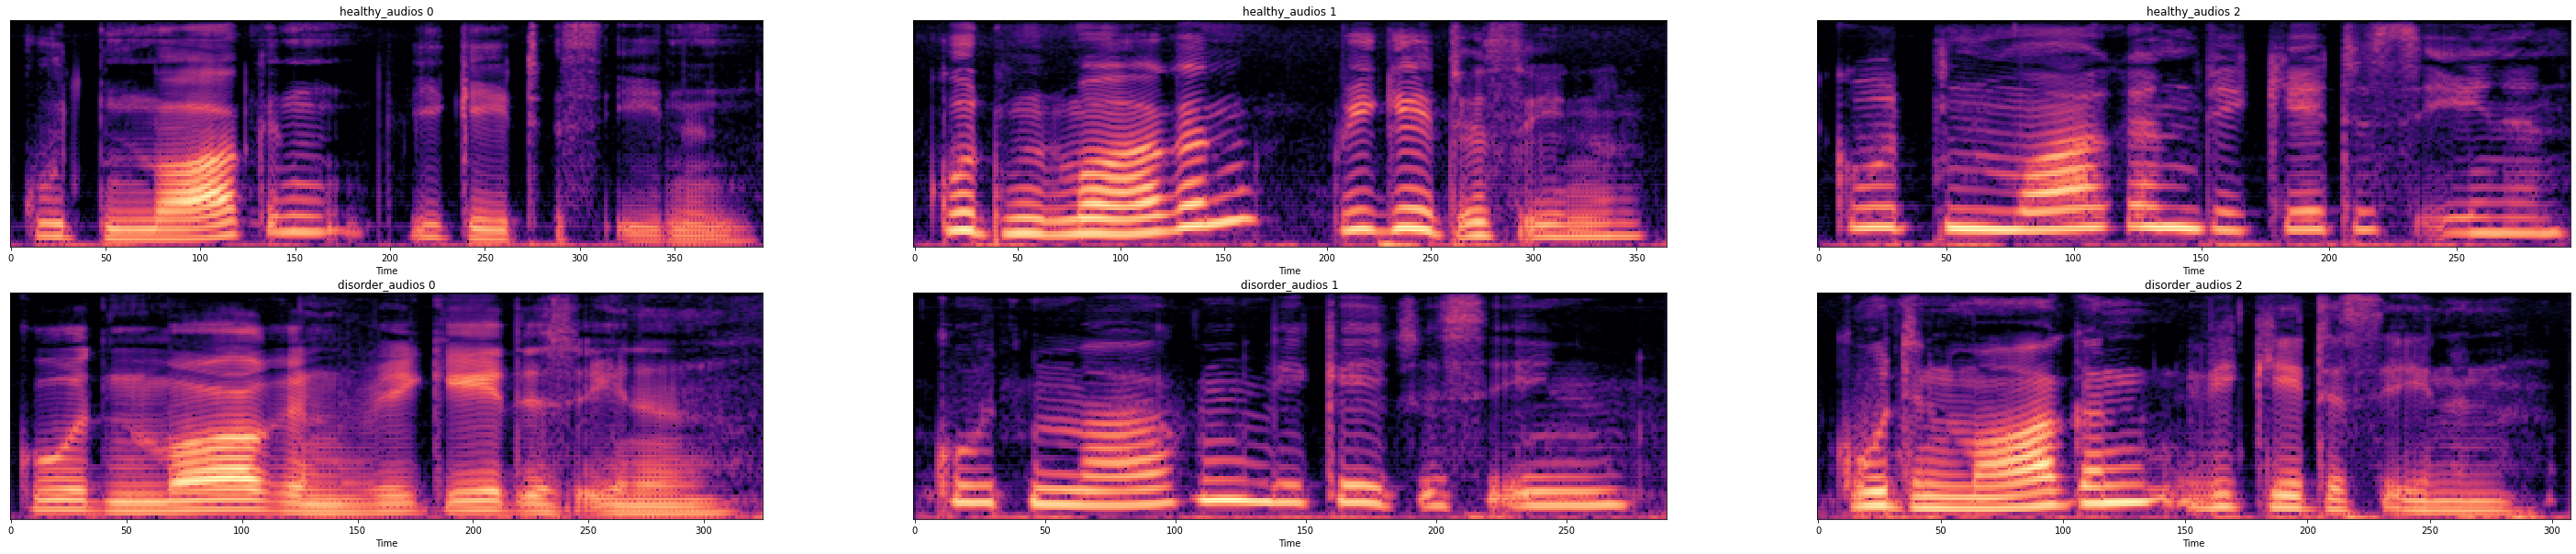

In [3]:
pltsize = 5
plt.figure(figsize=(10*pltsize,pltsize*2))#하나당 50,5

for i in range(3):
    plt.subplot(2,3,i+1)
    sr=16000
    win_length =  np.int64(16000/40) #
    n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
    hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

    stft = librosa.stft(healthy_audios[i], win_length=win_length,n_fft=n_fft, hop_length=hop_length)
    magnitude = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(magnitude)

    power_spectro = librosa.db_to_amplitude(log_spectrogram)**2


    #D = np.abs(librosa.stft(y))**2
    S = librosa.feature.melspectrogram(S=power_spectro, sr=sr)
    S = librosa.core.power_to_db(S,ref=np.max)

    librosa.display.specshow(S, sr=sr, hop_length=hop_length,x_axis='frames')
    plt.xlabel("Time")
    plt.title("healthy_audios "+str(i))

for i in range(3):
    plt.subplot(2,3,i+3+1)
    sr=16000
    win_length =  np.int64(16000/40) # 1250
    n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
    hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

    stft = librosa.stft(disorder_audios[i], win_length=win_length,n_fft=n_fft, hop_length=hop_length)
    magnitude = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(magnitude)

    power_spectro = librosa.db_to_amplitude(log_spectrogram)**2


    #D = np.abs(librosa.stft(y))**2
    S = librosa.feature.melspectrogram(S=power_spectro, sr=sr)
    S = librosa.core.power_to_db(S,ref=np.max)

    librosa.display.specshow(S, sr=sr, hop_length=hop_length,x_axis='frames')
    plt.xlabel("Time")
    plt.title("disorder_audios "+str(i))

In [45]:
plt.rc('font', size=20)        # 기본 폰트 크기

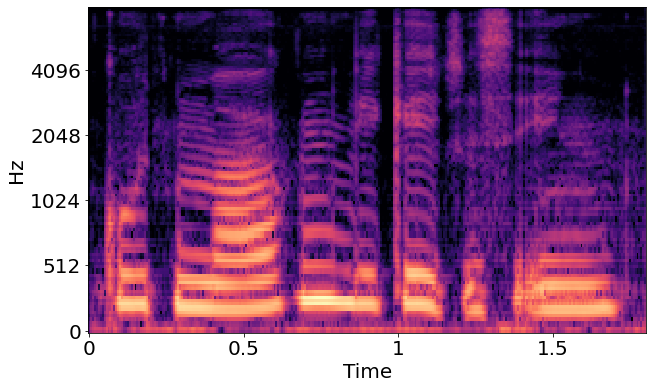

In [46]:
plt.figure(figsize=(10,6))
sr=16000
win_length =  np.int64(16000/40) # 1250
n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

stft = librosa.stft(disorder_audios[1], win_length=win_length,n_fft=n_fft, hop_length=hop_length)
magnitude = np.abs(stft)
log_spectrogram = librosa.amplitude_to_db(magnitude)

power_spectro = librosa.db_to_amplitude(log_spectrogram)**2


#D = np.abs(librosa.stft(y))**2
S = librosa.feature.melspectrogram(S=power_spectro, sr=sr)
S = librosa.core.power_to_db(S,ref=np.max)

librosa.display.specshow(S, sr=sr, hop_length=hop_length,x_axis='time',y_axis='mel')
plt.xlabel("Time")

plt.savefig("melspectro_932.png",dpi=500)

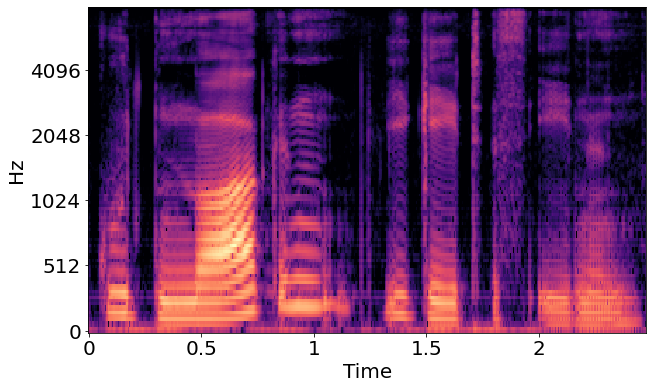

In [47]:
plt.figure(figsize=(10,6))
sr=16000
win_length =  np.int64(16000/40) # 1250
n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

stft = librosa.stft(healthy_audios[0], win_length=win_length,n_fft=n_fft, hop_length=hop_length)
magnitude = np.abs(stft)
log_spectrogram = librosa.amplitude_to_db(magnitude)

power_spectro = librosa.db_to_amplitude(log_spectrogram)**2


#D = np.abs(librosa.stft(y))**2
S = librosa.feature.melspectrogram(S=power_spectro, sr=sr)
S = librosa.core.power_to_db(S,ref=np.max)

librosa.display.specshow(S, sr=sr, hop_length=hop_length,x_axis='time',y_axis='mel')
plt.xlabel("Time")


plt.savefig("melspectro_94.png",dpi=500)

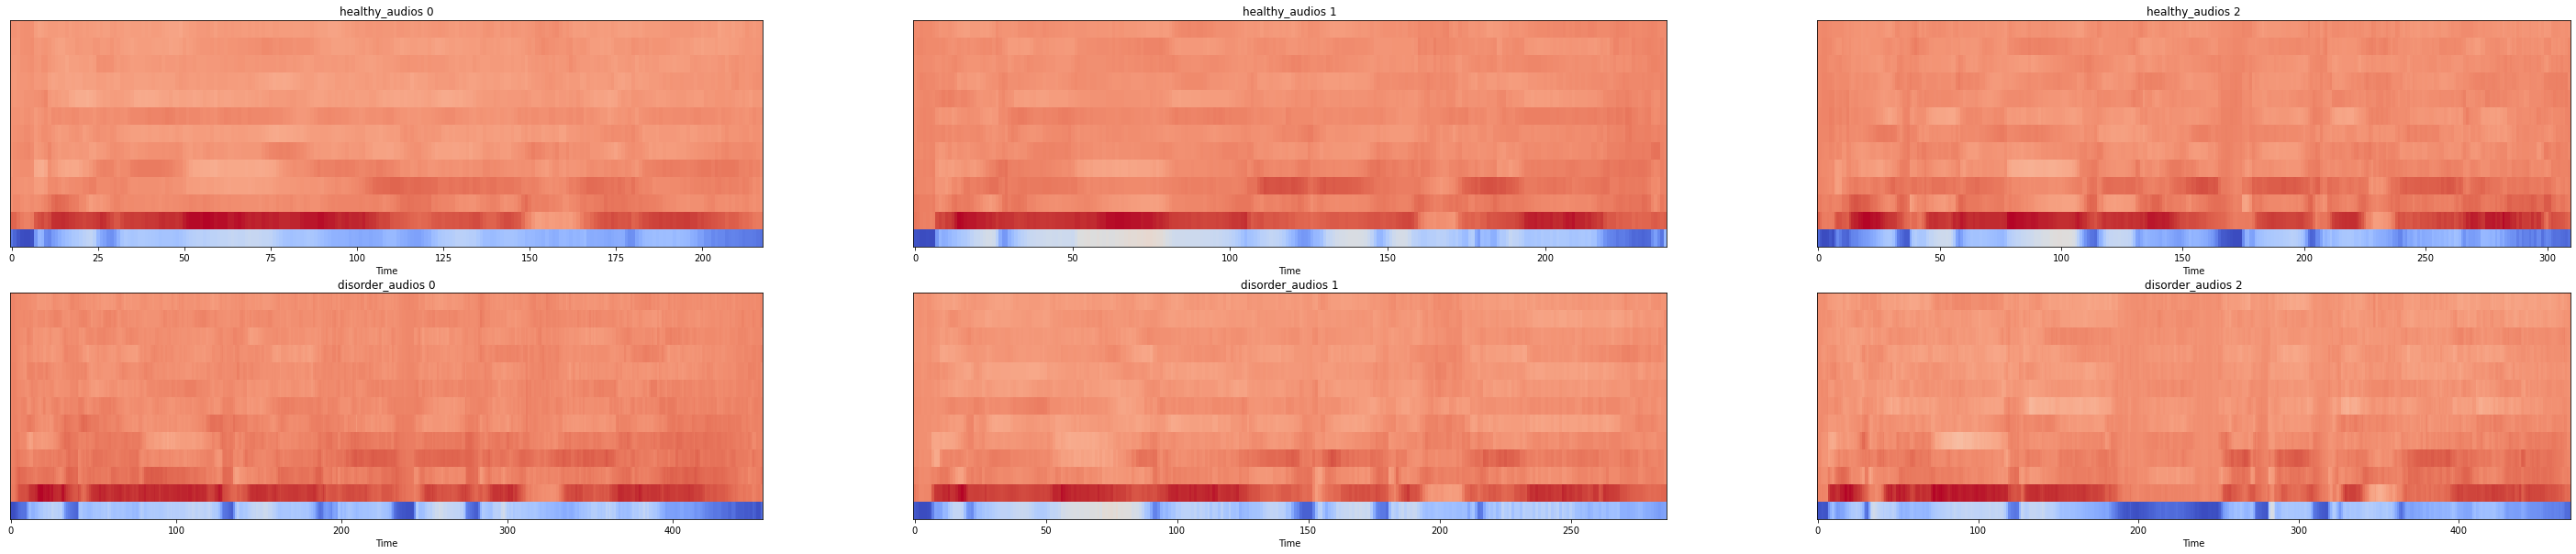

In [43]:
pltsize = 5
plt.figure(figsize=(10*pltsize,pltsize*2))#하나당 50,5

for i in range(3):
    plt.subplot(2,3,i+1)
    sr=16000
    win_length =  np.int64(16000/40) # 1250
    n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
    hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

    MFCCs = librosa.feature.mfcc(y=healthy_audios[i], sr=sr,win_length=win_length ,n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

    librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length,x_axis='frames')
    plt.xlabel("Time")
    plt.title("healthy_audios "+str(i))

for i in range(3):
    plt.subplot(2,3,i+3+1)
    sr=16000
    win_length =  np.int64(16000/40) # 1250
    n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
    hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

    MFCCs = librosa.feature.mfcc(y=disorder_audios[i], sr=sr,win_length=win_length ,n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

    librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length,x_axis='frames')
    plt.xlabel("Time")
    plt.title("disorder_audios "+str(i))

concat dataset

In [76]:
import torch
concat_audios = []
sr=16000

concat_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/pathology/a/high/export/1912-a_h.wav')
concat_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/pathology/a/neutral/export/819-a_n.wav')
concat_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/pathology/a/low/export/932-a_l.wav')


concat_audios =[ librosa.load(aud, sr=sr)[0] for aud in concat_audios ]


#length = sr*2 #sample rate *2 padding을 위한 파라미터 (하이퍼 파라미터로인해 사이즈는 계속 바뀐다.)
#pad1d = lambda a, i: a[0:i] if a.shape[0] > i else np.hstack((a, np.zeros((i-a.shape[0]))))        
#concat_audios=[pad1d(sig,length) for sig in concat_audios ]

concat_audios=np.concatenate(concat_audios)



In [80]:
concat_audios=torch.tensor(concat_audios)
length = sr*5 #sample rate *2 padding을 위한 파라미터 (하이퍼 파라미터로인해 사이즈는 계속 바뀐다.)
pad1d = lambda a, i: a[0:i] if a.shape[0] > i else torch.hstack((a, torch.zeros((i-a.shape[0]))))        
concat_audios = pad1d(concat_audios,length)

In [81]:
concat_audios.shape

torch.Size([80000])

Text(0.5, 1.0, 'vowel concat disorder_audios')

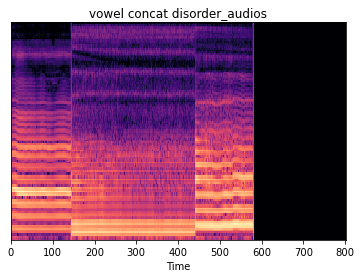

In [82]:
sr=16000
win_length =  np.int64(16000/40) # 1250
n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4
concat_audios = concat_audios.numpy()
stft = librosa.stft(concat_audios, win_length=win_length,n_fft=n_fft, hop_length=hop_length)
magnitude = np.abs(stft)
log_spectrogram = librosa.amplitude_to_db(magnitude)

power_spectro = librosa.db_to_amplitude(log_spectrogram)**2


#D = np.abs(librosa.stft(y))**2
S = librosa.feature.melspectrogram(S=power_spectro, sr=sr)
S = librosa.core.power_to_db(S,ref=np.max)

librosa.display.specshow(S, sr=sr, hop_length=hop_length,x_axis='frames')
plt.xlabel("Time")
plt.title("vowel concat disorder_audios")

# a,i,u spectrum 분석

In [137]:
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt

FIG_SIZE = (15,10)
sr=16000


healthy_audios = []
disorder_audios = []

healthy_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/healthy/a/high/export/94-a_h.wav')
healthy_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/healthy/a/high/export/2561-a_h.wav')
healthy_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/healthy/a/high/export/1179-a_h.wav')

disorder_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/pathology/a/high/export/1912-a_h.wav')
disorder_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/pathology/a/high/export/932-a_h.wav')
disorder_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/pathology/a/high/export/819-a_h.wav')


healthy_audios =[ librosa.load(aud, sr=sr)[0] for aud in healthy_audios ]
disorder_audios =[ librosa.load(aud, sr=sr)[0] for aud in disorder_audios ]



In [133]:
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt

FIG_SIZE = (15,10)
sr=16000


healthy_audios = []
disorder_audios = []

healthy_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/healthy/u/high/export/94-u_h.wav')
healthy_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/healthy/u/high/export/2561-u_h.wav')
healthy_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/healthy/u/high/export/1179-u_h.wav')

disorder_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/pathology/u/high/export/1912-u_h.wav')
disorder_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/pathology/u/high/export/932-u_h.wav')
disorder_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/pathology/u/high/export/819-u_h.wav')


healthy_audios =[ librosa.load(aud, sr=sr)[0] for aud in healthy_audios ]
disorder_audios =[ librosa.load(aud, sr=sr)[0] for aud in disorder_audios ]



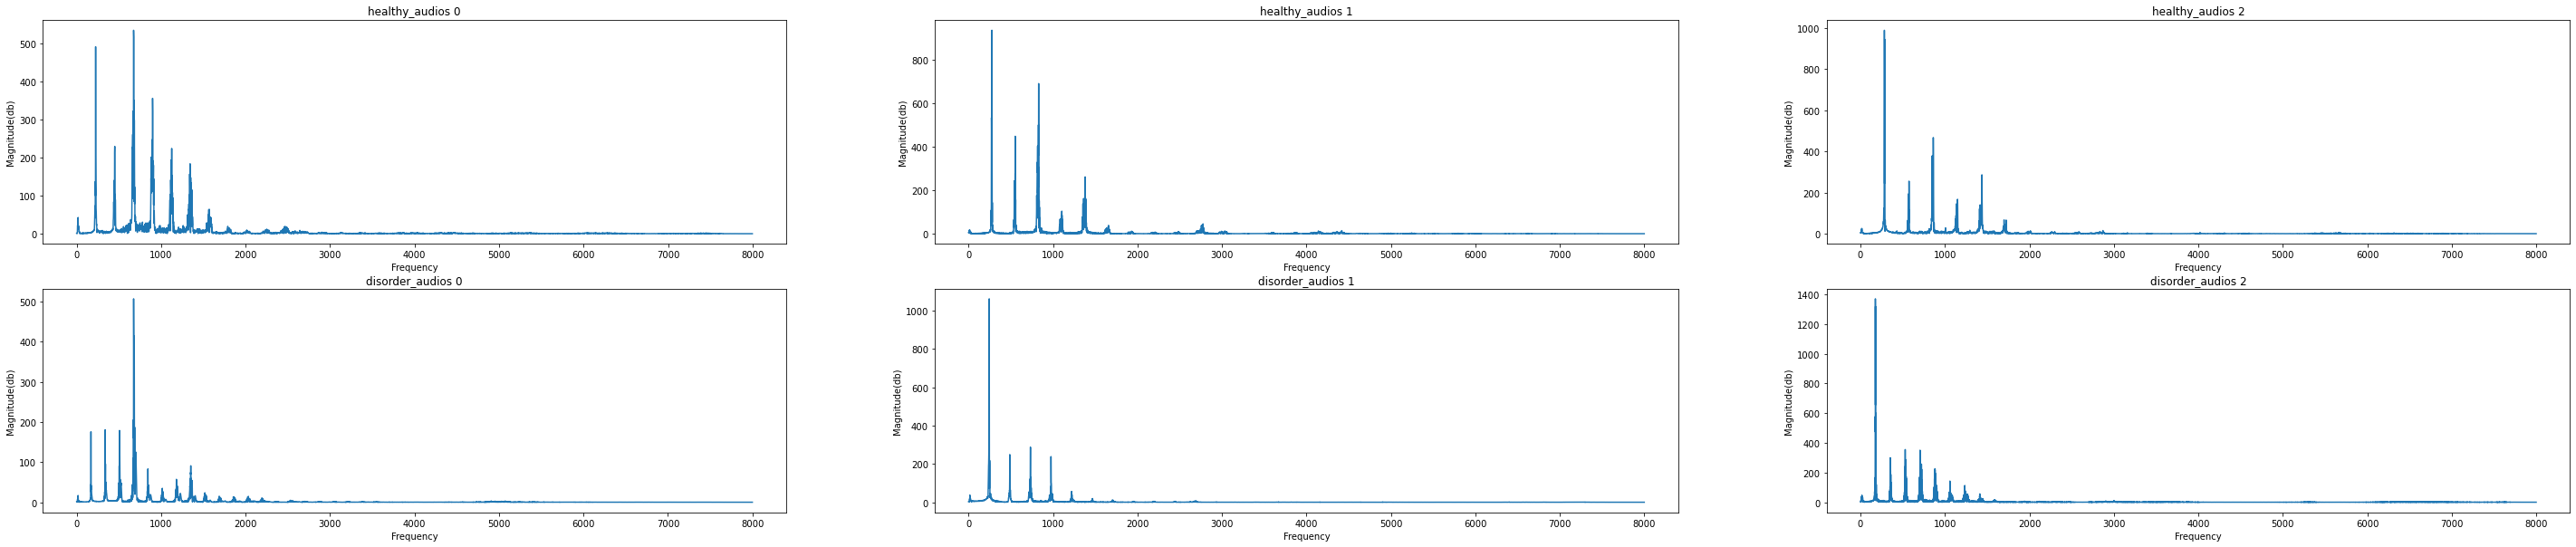

In [138]:
pltsize = 5
plt.figure(figsize=(10*pltsize,pltsize*2))#하나당 50,5

for i in range(3):
    plt.subplot(2,3,i+1)
    fft = np.fft.fft(healthy_audios[i])

    # 복소공간 값 절댓갑 취해서, magnitude 구하기
    magnitude = np.abs(fft) 

    # Frequency 값 만들기
    f = np.linspace(0,sr,len(magnitude))

    # 푸리에 변환을 통과한 specturm은 대칭구조로 나와서 high frequency 부분 절반을 날려고 앞쪽 절반만 사용한다.
    #left_spectrum = magnitude
    #left_f=f
    left_spectrum = magnitude[:int(len(magnitude)/2)]
    left_f = f[:int(len(magnitude)/2)]

    plt.plot(left_f, left_spectrum)
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude(db)")
    plt.title("healthy_audios "+str(i))

for i in range(3):
    plt.subplot(2,3,i+3+1)
    fft = np.fft.fft(disorder_audios[i])

    # 복소공간 값 절댓갑 취해서, magnitude 구하기
    magnitude = np.abs(fft) 

    # Frequency 값 만들기
    f = np.linspace(0,sr,len(magnitude))

    # 푸리에 변환을 통과한 specturm은 대칭구조로 나와서 high frequency 부분 절반을 날려고 앞쪽 절반만 사용한다.
    #left_spectrum = magnitude
    #left_f=f
    left_spectrum = magnitude[:int(len(magnitude)/2)]
    left_f = f[:int(len(magnitude)/2)]

    plt.plot(left_f, left_spectrum)
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude(db)")
    plt.title("disorder_audios "+str(i))

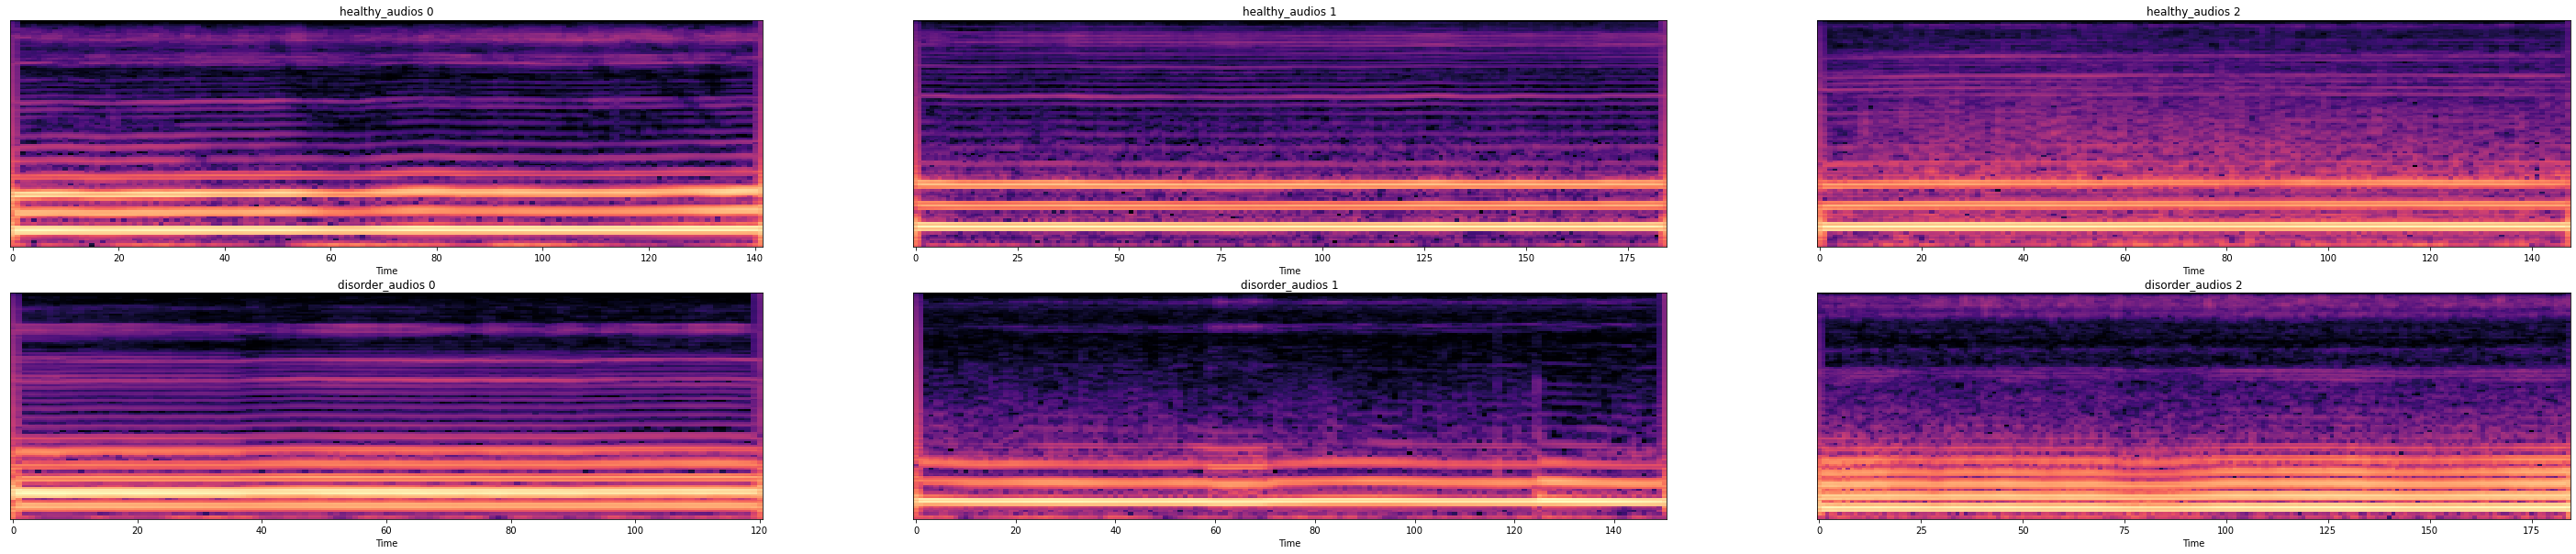

In [136]:
pltsize = 5
plt.figure(figsize=(10*pltsize,pltsize*2))#하나당 50,5

for i in range(3):
    plt.subplot(2,3,i+1)
    sr=16000
    win_length =  np.int64(16000/40) #
    n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
    hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

    stft = librosa.stft(healthy_audios[i], win_length=win_length,n_fft=n_fft, hop_length=hop_length)
    magnitude = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(magnitude)

    power_spectro = librosa.db_to_amplitude(log_spectrogram)**2


    #D = np.abs(librosa.stft(y))**2
    S = librosa.feature.melspectrogram(S=power_spectro, sr=sr)
    S = librosa.core.power_to_db(S,ref=np.max)

    librosa.display.specshow(S, sr=sr, hop_length=hop_length,x_axis='frames')
    plt.xlabel("Time")
    plt.title("healthy_audios "+str(i))

for i in range(3):
    plt.subplot(2,3,i+3+1)
    sr=16000
    win_length =  np.int64(16000/40) # 1250
    n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
    hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

    stft = librosa.stft(disorder_audios[i], win_length=win_length,n_fft=n_fft, hop_length=hop_length)
    magnitude = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(magnitude)

    power_spectro = librosa.db_to_amplitude(log_spectrogram)**2


    #D = np.abs(librosa.stft(y))**2
    S = librosa.feature.melspectrogram(S=power_spectro, sr=sr)
    S = librosa.core.power_to_db(S,ref=np.max)

    librosa.display.specshow(S, sr=sr, hop_length=hop_length,x_axis='frames')
    plt.xlabel("Time")
    plt.title("disorder_audios "+str(i))

In [6]:
import torch
import torch.nn as nn # 인공 신경망 모델들 모아놓은 모듈
import torch.nn.functional as F #그중 자주 쓰이는것들을 F로
import torchvision.models as models
import torchaudio
import torchaudio.transforms as T
import librosa
import numpy as np

In [36]:
win_length =  np.int64(16000/40) # 400
n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 w

mel_scale = T.MelSpectrogram(
            sample_rate=16000,
            n_fft=400,
            win_length=400,
            hop_length=160,
            n_mels=128,
            center=True,
            pad_mode="constant",
            power=2.0,
            f_max=8000,
            norm="slaney",
            mel_scale="slaney",
            window_fn=torch.hann_window
    )

mel_scale = T.MelSpectrogram(
    sample_rate=16000,
    n_fft=1024,
    win_length=1024,
    hop_length=256,
    n_mels=80,
    f_min=0,
    f_max=8000,
    power=1.0,
    wkwargs={"periodic":False},
    window_fn=torch.hann_window
)

get_spectrogram = T.Spectrogram(
    n_fft=n_fft,
    win_length=n_fft,
    hop_length=hop_length,
    center=True,
    pad_mode="constant",
    power=2.0)

# mel_scale = T.MelSpectrogram(
#             sample_rate=16000,
#             n_fft=win_length,
#             win_length=win_length,
#             hop_length=hop_length,
#             n_mels=128,
#             center=True,
#             pad_mode="constant",
#             power=2.0,
#             norm="slaney",
#             mel_scale="slaney",
#             window_fn=torch.hann_window
#     )
# mel_scale = T.MelSpectrogram(
#             sample_rate=16000,
#             n_fft=1024,
#             win_length=1024,
#             hop_length=512,
#             n_mels=128,
#             power=2.,
#     )


power_to_db = T.AmplitudeToDB(stype="power",top_db=80)

def take_log(feature):
    amp2db = torchaudio.transforms.AmplitudeToDB(stype="amplitude")
    amp2db.amin=1e-5
    return amp2db(feature).clamp(min=-50,max=80)

In [8]:
sig_mel.shape

NameError: name 'sig_mel' is not defined

torch.Size([80, 156])


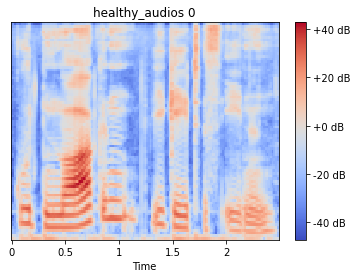

In [41]:
sig=torch.from_numpy(healthy_audios[0]).type(torch.float32)# 타입 변화
#sig,sr = torchaudio.load('D:/project/voice_pathology_ai/voice_data/all_data_ver2/healthy/phrase/export/946-phrase.wav')
#sig = T.Resample(sr,16000)(sig)
sig_mel=mel_scale(sig)
#sig_mel=power_to_db(sig_mel)
print(sig_mel.size())
sig_mel=take_log(sig_mel)
#sig_mel=torchaudio.functional.amplitude_to_DB(sig_mel,amin=1e-10,top_db=80,multiplier=10,db_multiplier=torch.log10(max( [torch.max(sig_mel),1e-10] ) ) )

sig_mel=sig_mel.cpu().numpy()
sig_mel=sig_mel.squeeze()
#sig_mel=librosa.core.power_to_db(sig1_mel,ref=np.max)

librosa.display.specshow(sig_mel, sr=16000, hop_length=256,x_axis='time')
plt.xlabel("Time")
plt.title("healthy_audios "+str(0))
plt.colorbar(format='%+2.0f dB')

torch.Size([201, 397])


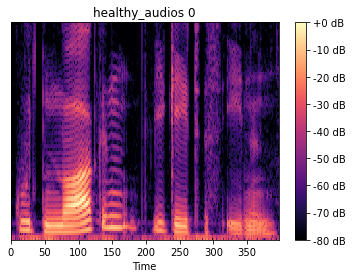

In [42]:
sig=torch.from_numpy(healthy_audios[0]).type(torch.float32)# 타입 변화
#sig,sr = torchaudio.load('D:/project/voice_pathology_ai/voice_data/all_data_ver2/healthy/phrase/export/946-phrase.wav')
#sig = T.Resample(sr,16000)(sig)
sig_mel=get_spectrogram(sig)
#sig_mel=power_to_db(sig_mel)
sig_mel=torchaudio.functional.amplitude_to_DB(sig_mel,amin=1e-10,top_db=80,multiplier=10,db_multiplier=torch.log10(max( [torch.max(sig_mel),1e-10] ) ) )
print(sig_mel.size())
sig_mel=sig_mel.cpu().numpy()
sig_mel=sig_mel.squeeze()

#sig_mel=librosa.core.power_to_db(sig_mel,ref=np.max)

librosa.display.specshow(sig_mel[:100,:], sr=16000, hop_length=hop_length,x_axis='frames')
plt.xlabel("Time")
plt.title("healthy_audios "+str(0))
plt.colorbar(format='%+2.0f dB')

In [9]:
sig=torch.from_numpy(healthy_audios[1]).type(torch.float32)# 타입 변화
#sig,sr = torchaudio.load('D:/project/voice_pathology_ai/voice_data/all_data_ver2/healthy/phrase/export/946-phrase.wav')
#sig = T.Resample(sr,16000)(sig)
sig_mel=get_spectrogram(sig)
#sig_mel=power_to_db(sig_mel)
sig_mel=torchaudio.functional.amplitude_to_DB(sig_mel,amin=1e-10,top_db=80,multiplier=10,db_multiplier=torch.log10(max( [torch.max(sig_mel),1e-10] ) ) )

NameError: name 'get_spectrogram' is not defined

In [63]:
sig_mel.tile((1,2))

torch.Size([201, 412])

In [19]:
sig_mel.shape

(128, 249)

In [131]:
length = sr*3 #sample rate *2 padding을 위한 파라미터 (하이퍼 파라미터로인해 사이즈는 계속 바뀐다.)
pad1d = lambda a, i: a[0:i] if a.shape[0] > i else np.hstack((a, np.zeros((i-a.shape[0]))))        

In [187]:
sig.size()

torch.Size([2, 48000])

torch.Size([2, 128, 301])


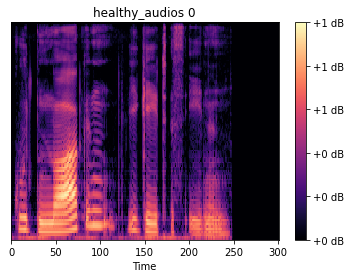

In [204]:
def batch_min_max(batch):
    print(batch.size())
    batch_size,height,width = batch.size(0),batch.size(1),batch.size(2)
    batch = batch.contiguous().view(batch.size(0), -1)
    batch -= batch.min(1, keepdim=True)[0]
    batch /= batch.max(1, keepdim=True)[0]
    batch = batch.view(batch_size, height, width)
    return batch

sig=torch.from_numpy(pad1d(healthy_audios[0],length) ).type(torch.float32)# 타입 변화
sig2=torch.from_numpy(pad1d(healthy_audios[1],length) ).type(torch.float32)# 타입 변화



sig = torch.stack([sig,sig2],dim=0)

sig_mel=mel_scale(sig)
#sig_mel=power_to_db(sig_mel)
sig_mel=torchaudio.functional.amplitude_to_DB(sig_mel,amin=1e-10,top_db=80,multiplier=10,db_multiplier=torch.log10(sig_mel.max()))

sig_mel = batch_min_max(sig_mel)
#power_to_db = T.AmplitudeToDB(stype="power",top_db=80)

#sig_mel = power_to_db(sig_mel)
sig_mel=sig_mel.cpu().numpy()
#sig_mel=librosa.core.power_to_db(sig_mel,ref=np.max)

librosa.display.specshow(sig_mel[0], sr=sr, hop_length=hop_length,x_axis='frames')
plt.xlabel("Time")
plt.title("healthy_audios "+str(0))
plt.colorbar(format='%+2.0f dB')

In [190]:
sig_mel.shape

(2, 128, 301)

TypeError: max() received an invalid combination of arguments - got (numpy.ndarray, dim=int), but expected one of:
 * (Tensor input)
 * (Tensor input, Tensor other, *, Tensor out)
 * (Tensor input, int dim, bool keepdim, *, tuple of Tensors out)
 * (Tensor input, name dim, bool keepdim, *, tuple of Tensors out)


In [183]:
sig=torch.from_numpy(pad1d(healthy_audios[0],length) ).type(torch.float32)# 타입 변화
sig2=torch.from_numpy(pad1d(healthy_audios[1],length) ).type(torch.float32)# 타입 변화



sig = torch.stack([sig,sig2],dim=0)

sig_mel=mel_scale(sig)

sig_mel.amax(dim=[1,2])

tensor([48.3721, 27.2022])

In [170]:
sig_mel.amax(dim=[1,2])

torch.Size([2])

In [159]:
torch.max(sig_mel,dim=0)[0].size()

torch.Size([128, 301])

In [150]:
torch.min(sig_mel[0])

tensor(0.)

In [152]:
torch.max(sig_mel[1])

tensor(27.2022)

In [203]:

np.square(np.subtract(sig_mel[1],S)).mean()

0.0003555922606402903

In [102]:
print(S.min())
print(S.max())

-80.0
0.0


In [96]:
(sig_mel-S).sum()

218194.28

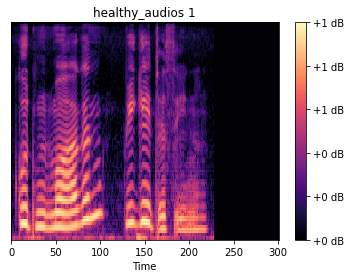

In [185]:
i=1
sr=16000
win_length =  np.int64(16000/40) #
n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

S = librosa.feature.melspectrogram(y = pad1d(healthy_audios[i],length),
                                            sr=sr,
                                            # hyp param
                                            n_mels = 128,
                                            n_fft = 400,
                                            win_length = 400,
                                            hop_length = 160,
                                            fmax = 8000,
                                            )

S = librosa.core.power_to_db(S,ref=np.max)
S = (S-S.min())/(S.max()-S.min())
librosa.display.specshow(S, sr=sr, hop_length=hop_length,x_axis='frames')
plt.xlabel("Time")
plt.title("healthy_audios "+str(i))
plt.colorbar(format='%+2.0f dB')

MSE :  3.8325923e-10


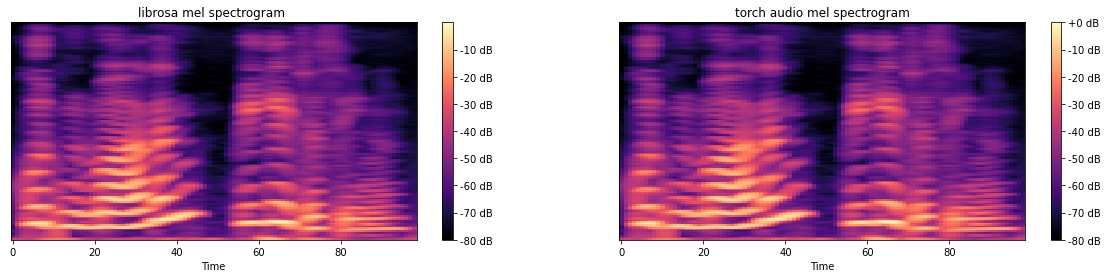

In [123]:
plt.figure(figsize=(10*2,2*2))#하나당 50,5

plt.subplot(1,2,1)

librosa.display.specshow(S, sr=sr, hop_length=hop_length,x_axis='frames')
plt.xlabel("Time")
plt.title("librosa mel spectrogram ")
plt.colorbar(format='%+2.0f dB')


plt.subplot(1,2,2)
librosa.display.specshow(sig_mel, sr=16000, hop_length=hop_length,x_axis='frames')
plt.xlabel("Time")
plt.title("torch audio mel spectrogram")
plt.colorbar(format='%+2.0f dB')

print("MSE : ",np.square(np.subtract(sig_mel,S)).mean())

Text(0.5, 1.0, 'healthy_audios 0')

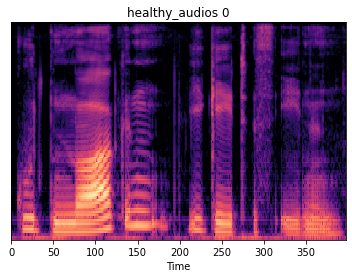

In [26]:
i=0
sr=16000
win_length =  np.int64(16000/40) #
n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

stft = librosa.stft(healthy_audios[i], win_length=win_length,n_fft=n_fft, hop_length=hop_length)
magnitude = np.abs(stft)
log_spectrogram = librosa.amplitude_to_db(magnitude)

power_spectro = librosa.db_to_amplitude(log_spectrogram)**2


#D = np.abs(librosa.stft(y))**2
S = librosa.feature.melspectrogram(S=power_spectro, sr=sr)
S = librosa.core.power_to_db(S,ref=np.max)

librosa.display.specshow(S, sr=sr, hop_length=hop_length,x_axis='frames')
plt.xlabel("Time")
plt.title("healthy_audios "+str(i))

In [38]:
S.shape

(128, 249)

In [37]:
S.max()

0.0

In [54]:
sig_mel.min()

-80.0